In [39]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [40]:
df = pd.read_csv("/content/drive/Othercomputers/My laptop/1 Strathmore/ICS/4th year/Semester II/ICS Project II/Implementation/GRP-B-ISP-ChrisKabumba/datasets/processed-data.csv/processed-data.csv")
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [41]:
# Reconstruct target variable (Severity)
def get_severity(row):
    if row["Severity_Mild"] == 1:
        return "Mild"
    elif row["Severity_Moderate"] == 1:
        return "Moderate"
    else:
        return "None"

df["Severity"] = df.apply(get_severity, axis=1)

In [ ]:
# Reconstruct age feature

In [ ]:
# Reconstruct gender feature

In [44]:
df.head(20)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,Severity
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,Mild
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,Mild
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,Mild
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,Moderate
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,Moderate
5,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,Moderate
6,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,None
7,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,None
8,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,None
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,None


In [45]:
# Define features (exclude all severity columns)
X = df.drop(["Severity_Mild", "Severity_Moderate", "Severity_None", "Severity"], axis=1)
y = df["Severity"]

In [48]:
# Define pipeline: preprocessing + classifier
model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [49]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Train model
model.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [51]:
# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.497



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

        Mild       0.00      0.00      0.00     15975
    Moderate       0.00      0.00      0.00     15909
        None       0.50      1.00      0.66     31476

    accuracy                           0.50     63360
   macro avg       0.17      0.33      0.22     63360
weighted avg       0.25      0.50      0.33     63360

Confusion Matrix:
 [[    0     0 15975]
 [    0     0 15909]
 [    0     0 31476]]


In [54]:
# 8️⃣ Save model and preprocessor
joblib.dump(model, "/content/drive/Othercomputers/My laptop/1 Strathmore/ICS/4th year/Semester II/ICS Project II/Implementation/GRP-B-ISP-ChrisKabumba/asthma_classifier/model/asthma_severity_model.pkl")
print("🎉 Model saved as asthma_severity_model.pkl")

🎉 Model saved as asthma_severity_model.pkl


**Improved performance**

**Data Preprocessing**

In [4]:
#Missing data
df.isnull().sum()

,0
Tiredness,0
Dry-Cough,0
Difficulty-in-Breathing,0
Sore-Throat,0
None_Sympton,0
Pains,0
Nasal-Congestion,0
Runny-Nose,0
None_Experiencing,0
Age_0-9,0


**Exploratory Data Analysis**

Visualize distributions, detect outliers, and correlations

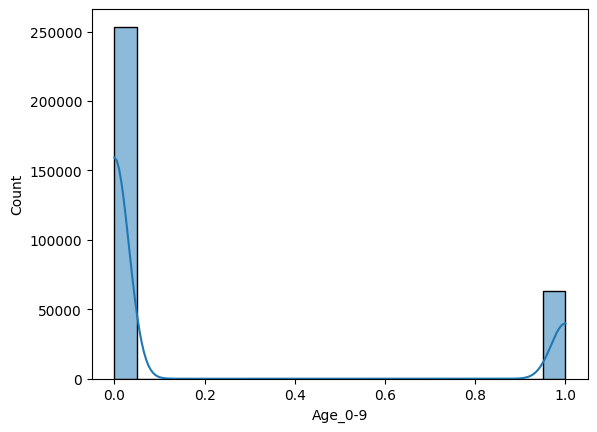

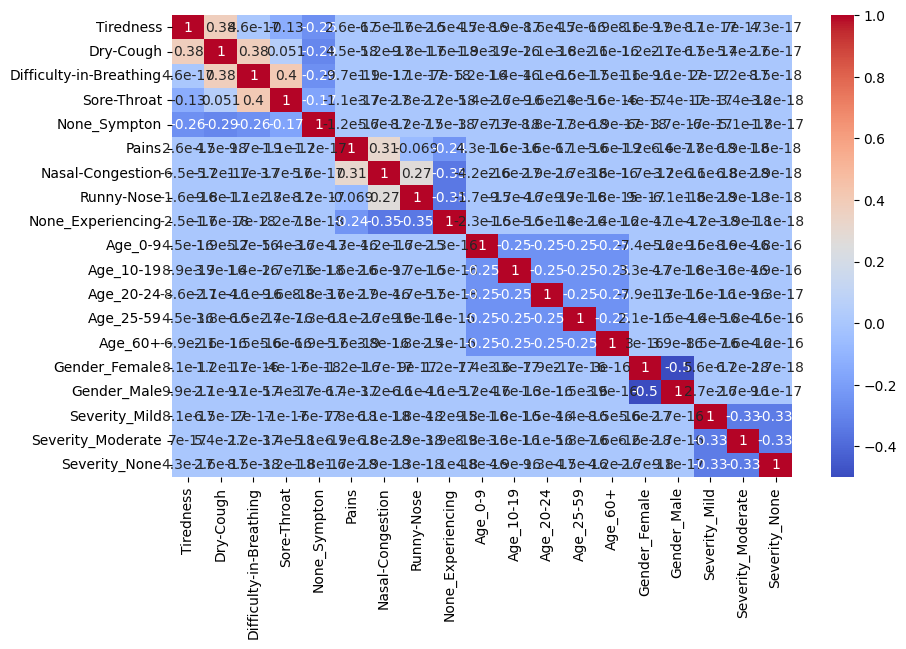

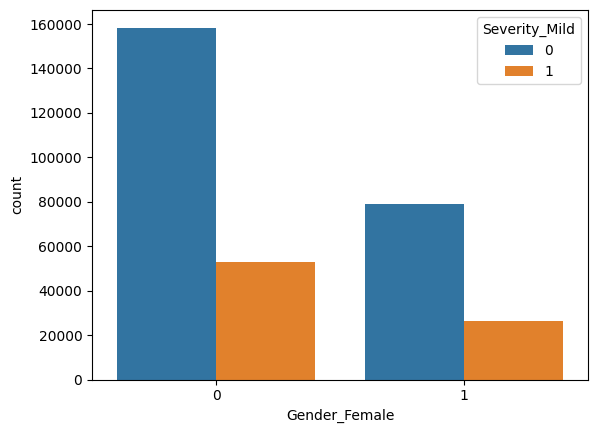

In [11]:
# Distribution of numeric features
sns.histplot(df["Age_0-9"], kde=True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Asthma cases by gender
sns.countplot(x='Gender_Female', hue='Severity_Mild', data=df)
plt.show()


**Feature Engineering**

Create new informative features

Improve predictive power

In [13]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None'],
      dtype='object')

In [17]:
# Create BMI category
# df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, np.inf],
#                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
# # Combine dust and smoking risk
# df['Env_Risk'] = np.where((df['DustExposure'] == 'High') & (df['Smoking'] == 'Yes'), 'High', 'Low')
# df.head()

**Outlier Detection & Removal**

Identify and handle extreme values

Reduce noise and improve model accuracy

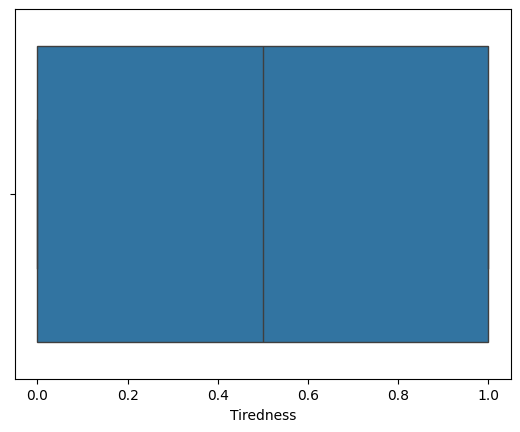

In [18]:
sns.boxplot(x=df['Tiredness'])
outliers = df[df['Tiredness'] > df['Tiredness'].quantile(0.99)]

**Feature Selection**

Dropping unimportant columns

Keep only relevant features

Reduce overfitting and speed up training

In [ ]:
df.drop("Severity_None", axis=1, inplace=True)

In [ ]:
df.drop("Severity_Moderate", axis=1, inplace=True)

In [21]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Mild',
       'Severity_Moderate', 'Severity_None'],
      dtype='object')

In [24]:
X = df.drop('Severity_Mild', axis=1)
y = df['Severity_Mild']

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)


**Splitting the data into X and y**

In [25]:
X = df.drop("Severity_Mild", axis=1)
y = df["Severity_Mild"]

In [26]:
# Creating training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [28]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity_Moderate',
       'Severity_None'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [30]:
df.size

6019200

In [31]:
y_pred = model.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7149305555555555
Confusion Matrix:
 [[38238  9282]
 [ 8780  7060]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     47520
           1       0.43      0.45      0.44     15840

    accuracy                           0.71     63360
   macro avg       0.62      0.63      0.62     63360
weighted avg       0.72      0.71      0.72     63360



In [35]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}


In [ ]:
joblib.dump(grid.best_estimator_, "best_tabular_classifier.joblib")